In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
#preprocessing
#print(x_train[0])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [22]:
#build model
def CNN_model(input_size=x_train.shape[1:]):
  model = Sequential()
  #blok pertama: 2 conv layer + 1 maxpooling layer
  model.add(Conv2D(32,(3,3), padding='same',input_shape = input_size))
  model.add(Activation('relu'))
  model.add(Conv2D(32,(3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=1))
  #blok kedua: 2 conv layer + 1 maxpooling layer
  model.add(Conv2D(64,(3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64,(3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #Dense layer
  model.add(Flatten())
  model.add(Dense(10))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
  return model


In [23]:
model = CNN_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 29, 29, 64)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
#model training
#membuat checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = 'final_cifar10_model.h5'
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

trained_weight_path = 'final_cifar10_weight.h5'
if(os.path.exists(trained_weight_path)):
  model.load.weights(trained_weight_path, by_name=True)


In [25]:
model.fit(x_train, y_train, batch_size=32, epochs=10, callbacks=[model_checkpoint], verbose=1)

Epoch 1/10
1563/1563 [==============================] - 496s 317ms/step - loss: 1.6102 - accuracy: 0.4217

Epoch 00001: loss improved from inf to 1.61025, saving model to final_cifar10_model.h5
Epoch 2/10
1563/1563 [==============================] - 494s 316ms/step - loss: 1.3216 - accuracy: 0.5322

Epoch 00002: loss improved from 1.61025 to 1.32163, saving model to final_cifar10_model.h5
Epoch 3/10
1563/1563 [==============================] - 498s 318ms/step - loss: 1.1934 - accuracy: 0.5811

Epoch 00003: loss improved from 1.32163 to 1.19337, saving model to final_cifar10_model.h5
Epoch 4/10
1563/1563 [==============================] - 500s 320ms/step - loss: 1.0914 - accuracy: 0.6189

Epoch 00004: loss improved from 1.19337 to 1.09144, saving model to final_cifar10_model.h5
Epoch 5/10
1563/1563 [==============================] - 495s 317ms/step - loss: 1.0104 - accuracy: 0.6501

Epoch 00005: loss improved from 1.09144 to 1.01041, saving model to final_cifar10_model.h5
Epoch 6/10
156

In [26]:
new_model = CNN_model()
new_model.load_weights(model_name)

model.evaluate(x_test, y_test, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


313/313 [==============================] - 24s 75ms/step - loss: 0.8897 - accuracy: 0.6971


[0.8897349834442139, 0.6970999836921692]

In [27]:
new_model.predict(x_test[0:1])

array([[6.0279882e-03, 1.9917001e-04, 7.0456951e-03, 6.7478955e-01,
        2.6043132e-03, 2.4291502e-01, 3.4906156e-02, 1.1316985e-03,
        2.8813165e-02, 1.5672434e-03]], dtype=float32)

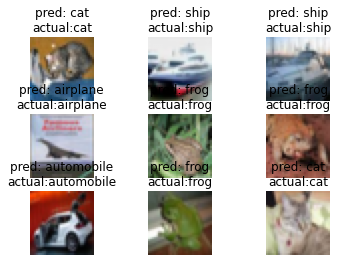

In [28]:
category_dict = {0:'airplane', 1:'automobile', 2:'bird', 3: 'cat', 4: 'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
pred_list=[]
plt.figure()
for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i])
  pred = new_model.predict(x_test[0:9]) #outputnya probabilitas masing-masing class
  pred_list.append(pred)
  pred_class = np.argmax(pred, axis=1) #ambil probabilitas dengan nilai terbesar
  plt.title("pred: " + category_dict[pred_class[i]] + "\nactual:" + category_dict[y_test[i][0]])
  plt.axis('off')
plt.show()